In [2]:
from IPython.display import clear_output
from datetime import datetime
from statistics import mean
from matplotlib import pyplot as plt
import pandas as pd
import robin_stocks as robin
import threading
import logging
import getpass
import csv


In [4]:
"""Generate Debug Log"""
LOG_FILENAME = 'script.log'
logging.basicConfig(filename=LOG_FILENAME, level=logging.DEBUG)
now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
logging.debug(now + " +Script started+")

In [4]:
"""Generate CSV Trading Tracker"""
start_time = now
with open('TradeLog.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|')
    datapoints = ['start_time', 'trade_time', 'symbol', 'price', 'sell/buy']
    writer.writerow(datapoints)

In [5]:
"""Read stock symbols to watch from stock watchlist file"""
with open('watchlist.csv', 'w') as watchlist:
    writer = csv.writer(watchlist, delimiter=',', quotechar='|')
    datapoints = ['symbol', 'time', 'price0', 'buy_price', 'sell_price', 'buy_date', 'sell_date']
    writer.writerow(datapoints)
    #generates csv file for storing symbols to watch 
    

    

    

def add_to_watchlist(symbol, price):
    time_added = now
    price0 = robin.stocks.get_latest_price(symbol)
    with open('watchlist.csv', 'w') as watchlist:
        writer = csv.writer(watchlist, delimiter=',', quotechar='|')
        datapoints = [symbol, time_added, price0]
        writer.writerow(datapoints)
    pass

In [6]:
"""Safe Mode prevents robot from actively trading, instead only tells you what to trade"""
safemode = input("stay in safe mode?(Y/N)")
if safemode == 'Y':
    safemode = 1
elif safemode == 'N':
    safemode = 0
else:
    print("Invalid answer, safe mode on")
    safemode = 1

stay in safe mode?(Y/N)Y


In [7]:
data = pd.read_csv('watchlist.csv')
symbols = data['symbol']
"""for symbol in symbols:
    buy_check(data, symbol)

def buy_check(data, symbol): #check conditions for buying the stock, returns a score rating for the stock
    '''buy+1 if: 
    price of symbol is lower than price0
    delta(price) over the past 7 days is increasing to zero
    '''
    price_now = robin.stocks.get_latest_price(symbol)
    price0 = data['symbol'==symbol]['price0'] 
    
    dropped = price_now < price0
    date_now = datetime.now().strftime('%Y-%m-%d')
    delta_list = delta(symbol, [date_now-7, date_now])
    print(date_now-7)
    """
    
ticker = {}
for symbol in data['symbol']:
    price1 = robin.stocks.get_latest_price(symbol)
    ticker[symbol] = pd.Series(price1)   

def ticker_list():
    for symbol in data['symbol']:
    #timer to wait 10 minutes then record next ticker
        price = robin.stocks.get_latest_price(symbol)
        ticker[symbol].append(price)
t = 5
while t>0:
    timer = threading.Timer(600, ticker_list)
    timer.start()
    t -= 1
print(ticker)

{}


In [13]:
def historical_check(symbol):
    historicals = robin.stocks.get_historicals(symbol, span='week', bounds='regular')

historicals = robin.stocks.get_historicals('QCOM', span='week', bounds='regular')


AttributeError: 'list' object has no attribute 'loc'

In [7]:
"""Return a list of price changes between each date in a date range"""
def tick_list(symbol, span='week'): #date_range takes in array of 2 dates [date1, date2]; return list of delta from date1 to date 2
    price_list = pd.DataFrame()
    historicals = robin.stocks.get_historicals(symbol, span='week', bounds='regular')
    #print(historicals)
    for h in historicals:
        h_date = h['begins_at']
        h_price = h['open_price']
        h_df = pd.Series([h_date, float(h_price)])
        #print(h_df[0])
        #pd.concat([price_list, h_df])
        price_list = price_list.append(h_df, ignore_index=True)
    return price_list
        
    #print(price_list)
    #for span of 'day' with extended bounds, ticker every 5 minutes from beginning of day
    #for span of 'week' with regular bounds, ticker every 10 minutes
    '''date = date1
    while date <= date2:
        date_price = 
        price_list.append([date, date_price])
        date+=1'''


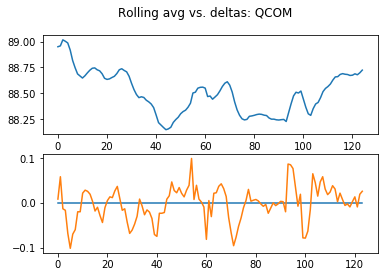

In [17]:
def delta_list(symbol, span='week'): 
    ticks = tick_list(symbol, span)
    smoothed = moving_avg(ticks, b=6)
    deltas = pd.Series()
    a = 0
    while a+1 < len(smoothed):
        deltas = deltas.append(smoothed.iloc[a+1] - smoothed.iloc[a])
        a+=1
    deltas = deltas.reset_index()
    fig, axs = plt.subplots(2)
    fig.suptitle('Rolling avg vs. deltas: '+ symbol)
    axs[0].plot(smoothed)
    axs[1].plot(deltas)
    plt.show()
    return deltas
mavg = delta_list('QCOM')



In [10]:
def moving_avg(l, b): #return list of moving averages with every b ticks
    a = 0
    #print(l[a:b])
    avgs = pd.Series(mean(l[a:b][1]))
    while b < len(l):
        a+=1
        b+=1
        avg = pd.Series(mean(l[a:b][1]))
        avgs = avgs.append(avg)
    avgs = avgs.reset_index()
    avgs = avgs.drop(columns='index')
    return avgs

l = tick_list('QCOM')

moving_avg(l, 6)

401 Client Error: Unauthorized for url: https://api.robinhood.com/quotes/historicals/?symbols=QCOM&interval=10minute&span=week&bounds=regular


TypeError: 'NoneType' object is not subscriptable

In [5]:
"""Login"""
#script requires log in everytime and wipes the credential variables once token is received to increase security
username = input("enter username:")
password = getpass.getpass("enter password:")
token_dict = robin.login(username, password)
token = token_dict['access_token']
username, password = 0, 0
if token_dict != None:
    logging.debug(now + ' +Token received+')
else:
    logging.warning(now + ' -Token NOT received!-')
clear_output()
print('Logged in successfully')

Logged in successfully


In [ ]:
"""Day-trade prevention: prevent from buying and selling same stock at same day"""


In [71]:
"""Strat: buy when current ticker is lowest of 1 week worth of tickers"""
def min_check(symbol, span='week'):
#check if current price is min of one week tickers
    price_list = tick_list(symbol, span)
    current_price = float(price_list.iloc[[-1]][1])
    minimum = min(price_list)
    prices = price_list[1]
    
    print('current price for '+str(symbol)+': '+str(current_price))
    if minimum == current_price:
        print('Current price for '+symbol+' is at one-week low, buy now')
    else:
        #price_list
        #frequency = len(price_list[price_list[1]==current_price])
        print('Current price for '+symbol+' is NOT at one-week low, wait')
min_check('PCG')


current price for PCG: 10.6
Current price for PCG is NOT at one-week low, wait


In [53]:
current_portfolio = robin.account.build_holdings()
fundamental_info = robin.stocks.get_fundamentals('QCOM')
fundamentals = {}
hist_price = {}
for key, info in current_portfolio.items():
    hist_price[key] = robin.stocks.get_historicals(key, span='week', bounds='regular')
    if float(current_portfolio[key]['percent_change']) > 25:
        print("fuck yea " + key)
    elif float(current_portfolio[key]['percent_change']) < -25: #stoploss
        '''Need to think of more sophisticated mechanisms for stoploss to prevent unnecessary loss
        maybe define a separate function (stoploss_check()) for stoploss'''
        print("Sell " + key + " now!")
    else: continue
current_portfolio



fuck yea AMD
fuck yea LUNA


{'QCOM': {'price': '88.450000',
  'quantity': '5.00000000',
  'average_buy_price': '71.3150',
  'equity': '442.25',
  'percent_change': '24.03',
  'equity_change': '85.675000',
  'type': 'stock',
  'name': 'Qualcomm',
  'id': '5ea5e761-1747-4911-beec-5a24af338329',
  'pe_ratio': '24.430500',
  'percentage': '41.19'},
 'AMD': {'price': '42.500000',
  'quantity': '8.00000000',
  'average_buy_price': '25.6100',
  'equity': '340.00',
  'percent_change': '65.95',
  'equity_change': '135.120000',
  'type': 'stock',
  'name': 'AMD',
  'id': '940fc3f5-1db5-4fed-b452-f3a2e4562b5f',
  'pe_ratio': '212.552000',
  'percentage': '31.67'},
 'LUNA': {'price': '7.780000',
  'quantity': '12.00000000',
  'average_buy_price': '3.6458',
  'equity': '93.36',
  'percent_change': '113.40',
  'equity_change': '49.610400',
  'type': 'stock',
  'name': 'Luna Innovations',
  'id': 'b0bba285-1e9a-4a06-b08f-a0c4a9d884f4',
  'pe_ratio': '90.349800',
  'percentage': '8.69'},
 'EADSY': {'price': '36.240000',
  'quant

Stop-loss ideas: 
price_delta = price - price[-1] for prices over a period of time if price != price[0]
record list of deltas of one week and observe if delta decreases or increases over the time period 
if delta trend is increasing from negative, stock price is reaching trough and a good time to invest
if delta trend is increasing from positive, stock price is rising, good time to sell
if delta trend is decreasing from positive, stock price is reaching peak, good time to sell
if delta trend is decreasing from negative, stock price just began to drop and will drop lower, good time to sell

or sell ONLY if equity_change is positive, which means no stop-loss

buy previous stock ONLY if:
The stock has not been traded today
current price < previous sell price